In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
df = pd.read_csv (r"C:\Users\jere2\Downloads\Electric_Vehicle_Population_Data.csv")

In [19]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [29]:
df.duplicated().any()

False

In [31]:
df.columns.unique()

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [20]:
car_counts_Cty = df ['City'].value_counts().nlargest(10)

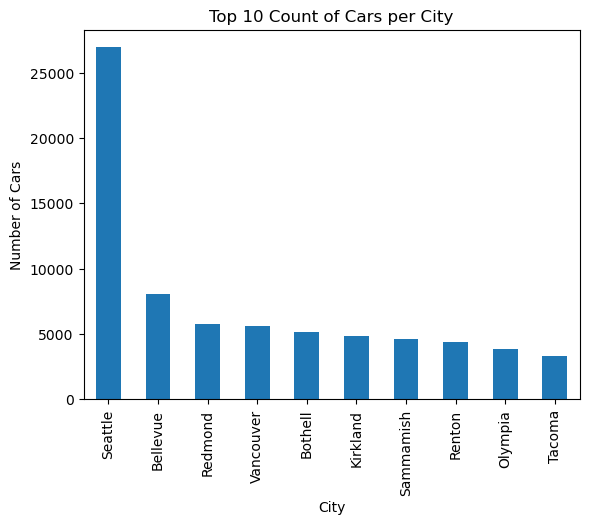

,City
Seattle,26932
Bellevue,8076
Redmond,5796
Vancouver,5599
Bothell,5176
Kirkland,4859
Sammamish,4657
Renton,4366
Olympia,3848
Tacoma,3333


In [21]:
car_counts_Cty = df['City'].value_counts().nlargest(10)
car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per City')
plt.show()
car_counts_cty_df = car_counts_Cty.to_frame()
car_counts_cty_df.style.background_gradient(cmap='Blues')

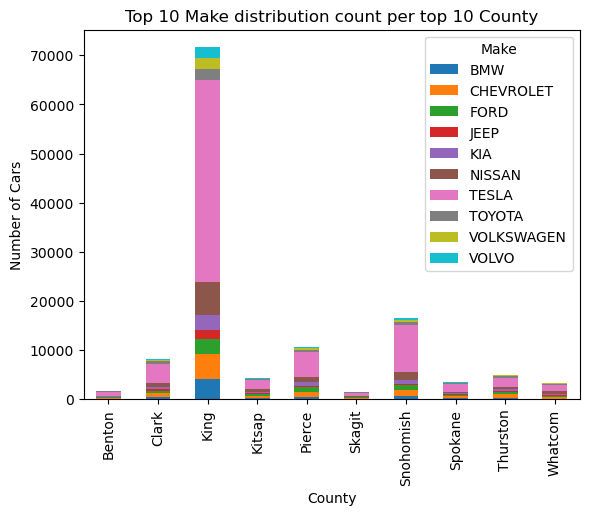

Make,BMW,CHEVROLET,FORD,JEEP,KIA,NISSAN,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
County,,,,,,,,,,
Benton,91,246,136,45,78,122,798,117,38,20
Clark,376,800,542,283,424,811,3838,640,256,170
King,4044,5172,3072,1852,3018,6684,41206,2133,2228,2229
Kitsap,228,528,321,136,286,621,1730,199,162,168
Pierce,526,1033,873,266,731,998,5192,430,305,259


In [22]:
cnt_MkCounty = df.groupby(['County', 'Make']).size().reset_index(name='Count')
grouped_data = cnt_MkCounty.groupby(['County', 'Make'])['Count'].sum().reset_index()
county_counts = grouped_data.groupby('County')['Count'].sum().reset_index()
make_counts = grouped_data.groupby('Make')['Count'].sum().reset_index()
top_counties = county_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)
filtered_data = grouped_data[grouped_data['County'].isin(top_counties['County']) & grouped_data['Make'].isin(top_makes['Make'])]
pivoted_data = filtered_data.pivot(index='County', columns='Make',values='Count').fillna(0)
pivoted_data.plot(kind='bar', stacked=True)
plt.title('Top 10 Make distribution count per top 10 County')
plt.xlabel('County')
plt.ylabel('Number of Cars')
plt.show()
pivoted_data.head()

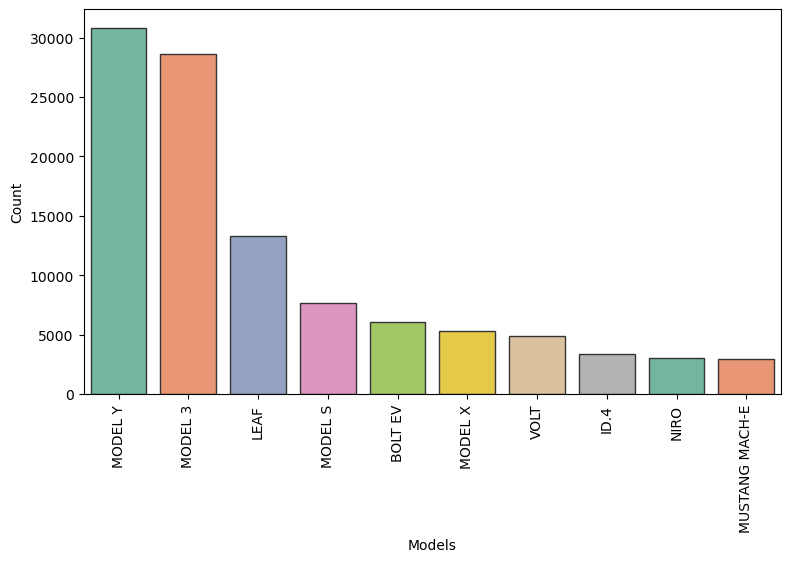

In [25]:
# Top 10 models in use
Models = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()